In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import json
from datetime import datetime, timedelta
import seaborn as sns

# Part 1 - Exploratory Analysis

The first few lines of this notebook are to load the data into a Pandas dataframe with the login time as the index and the number of logins (all set to 1).

In [2]:
login_df = pd.read_json('logins.json')

In [3]:
login_df['num_logins'] = np.repeat(1, len(login_df))

In [4]:
login_df.set_index('login_time', inplace=True)

In [5]:
login_df.head()

,num_logins
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [6]:
login_df = login_df.sort_index()

In [7]:
login_df['1970-01-02 04']

,num_logins
login_time,
1970-01-02 04:06:31,1
1970-01-02 04:06:36,1
1970-01-02 04:37:14,1
1970-01-02 04:38:19,1
1970-01-02 04:41:27,1
1970-01-02 04:42:35,1
1970-01-02 04:43:30,1
1970-01-02 04:45:10,1
1970-01-02 04:48:55,1


The check below is to see if there are any null values in the dataset.

In [8]:
login_df.isnull().sum()

num_logins    0
dtype: int64

The next step of the analysis is to resample the data into 15 minute intervals.

In [9]:
login_df_15 = login_df.resample('15T').sum()
login_df_15.head()

,num_logins
login_time,
1970-01-01 20:00:00,2.0
1970-01-01 20:15:00,6.0
1970-01-01 20:30:00,9.0
1970-01-01 20:45:00,7.0
1970-01-01 21:00:00,1.0


In [10]:
login_df_15.isnull().sum()

num_logins    407
dtype: int64

After resampling, there are 407 missing values in the number of logins, which means that there were no logins during that 15 minute timeframe. This is evident when you look at the login times in cell 7. The missing values will be replaced with 0s.

In [16]:
login_df_15 = login_df_15.fillna(0)

In [17]:
login_df_15.isnull().sum()

num_logins    0
dtype: int64

The first plot to look at is the histogram of the number of logins. Most of logins are between 0 and 10 for the 15 minute time periods with the number increasing to 50 in some cases.

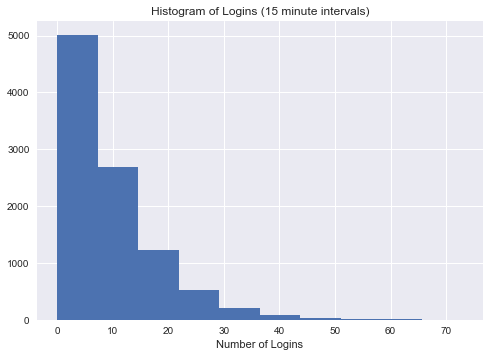

In [18]:
plt.hist(login_df_15['num_logins'])
plt.xlabel('Number of Logins')
plt.title('Histogram of Logins (15 minute intervals)')
plt.show()

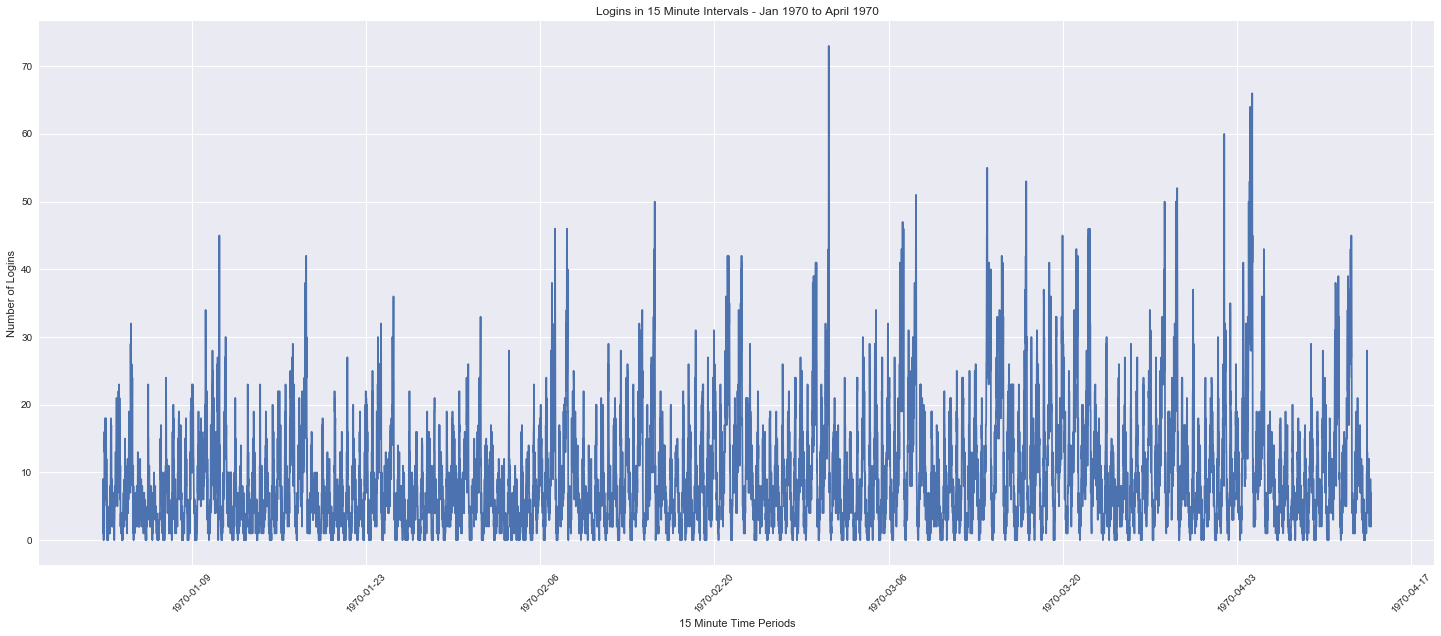

In [19]:
plt.figure(figsize=(25,10))
plt.plot(login_df_15)
plt.title('Logins in 15 Minute Intervals - Jan 1970 to April 1970')
plt.xlabel('15 Minute Time Periods')
plt.ylabel('Number of Logins')
plt.xticks(rotation=45)
plt.show()

The plot above shows all of the 15 minute intervals on the x-axis and the number of logins. The plot is very dense and hard to read but you can notice there is a cyclical nature in the logins. There are peaks and valleys in the chart. To break this down a little more, we can look at this graph based on the month.

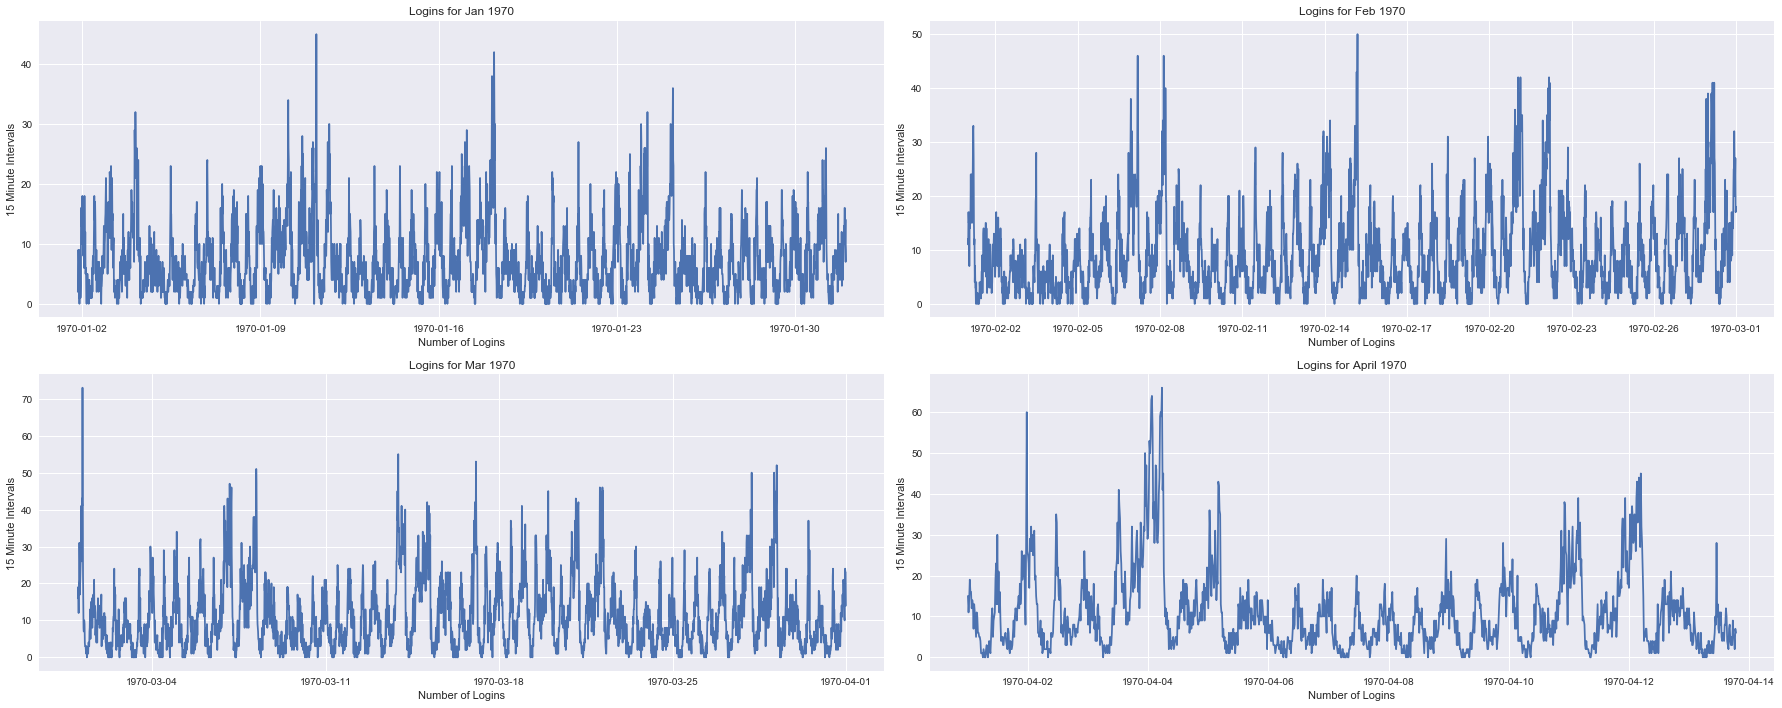

In [20]:
months = [['1970-01', 'Jan 1970'],['1970-02', 'Feb 1970'],['1970-03', 'Mar 1970'],['1970-04', 'April 1970']]

def generate_plots(dataframe):
    fig = plt.figure(figsize=(25,10))
    for i, month in enumerate(months):
        subset_logins = dataframe[month[0]]
        title = 'Logins for ' + month[1]
        ax = fig.add_subplot(2,2,i+1)
        plt.plot(subset_logins)
        plt.title(title)
        plt.xlabel('Number of Logins')
        plt.ylabel('15 Minute Intervals')
    plt.tight_layout()
    plt.show()

generate_plots(login_df_15)

In the plot above, you can see the time series plots for each of the 4 months of logins. The plots are still very dense but there seems to be a weekly cycle. To further examine this, we can look at the logins based on the day of the week.

In [21]:
login_df['weekday'] = login_df.index.weekday

In [22]:
login_df.head()

,num_logins,weekday
login_time,,
1970-01-01 20:12:16,1,3
1970-01-01 20:13:18,1,3
1970-01-01 20:16:10,1,3
1970-01-01 20:16:36,1,3
1970-01-01 20:16:37,1,3


In [23]:
days = [[0, 'red'],[1, 'purple'],[2, 'green'],[3, 'orange'],[4, 'pink'],[5, 'blue'],[6, 'black']]

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


(array([ 719171.,  719185.,  719199.,  719213.,  719227.,  719241.,
         719255.,  719269.]), <a list of 8 Text xticklabel objects>)

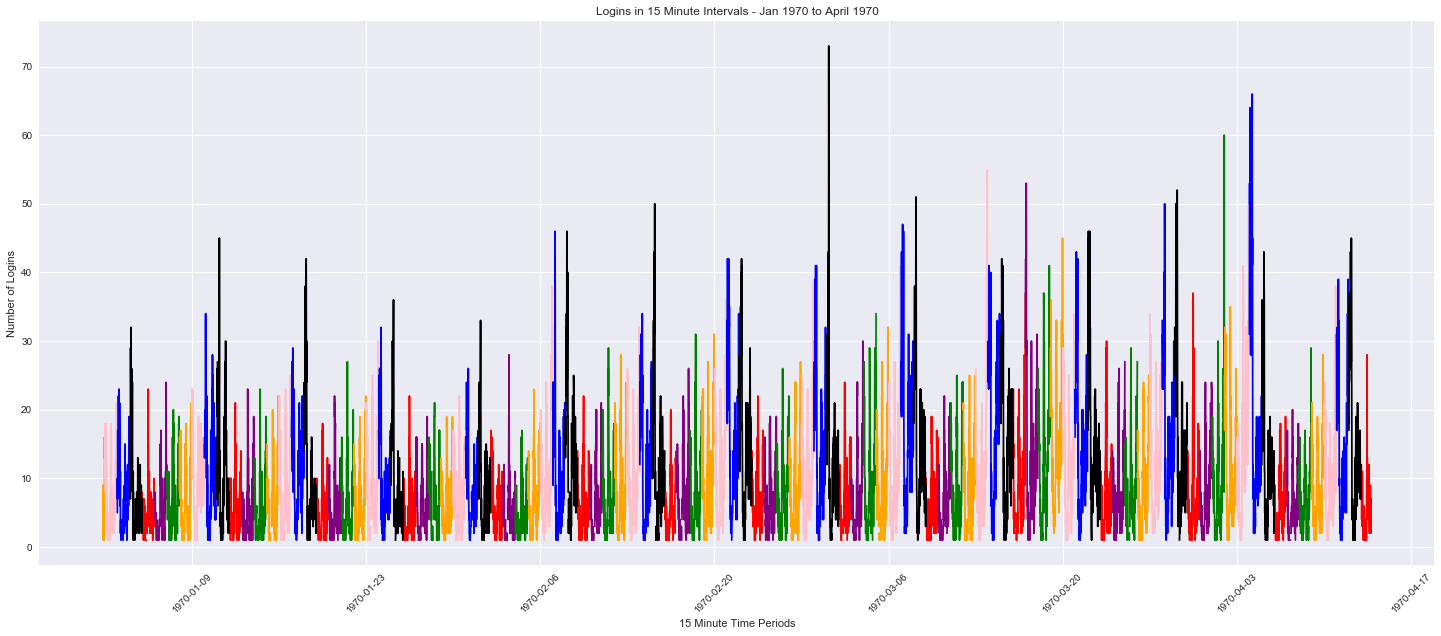

In [24]:
plt.figure(figsize=(25,10))
for day,color in days:
    test = login_df[login_df['weekday'] == day]
    test.drop('weekday', 1, inplace=True)
    test = test.resample('15T').sum()
    plt.plot(test, color=color)
plt.title('Logins in 15 Minute Intervals - Jan 1970 to April 1970')
plt.xlabel('15 Minute Time Periods')
plt.ylabel('Number of Logins')
plt.xticks(rotation=45)

The plot above color codes the day of the week. Based on this graph, you can see that the logins occur more frequently on the weekend compared to weekdays.

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


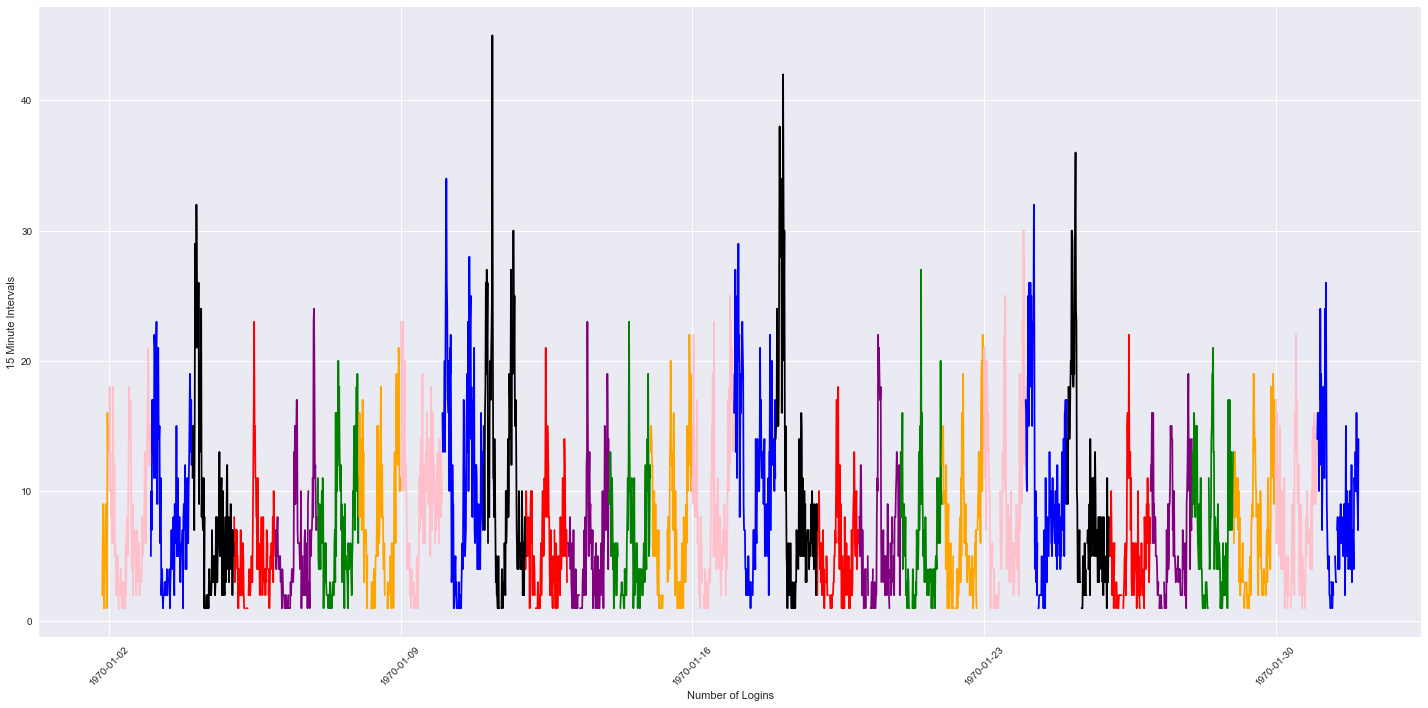

In [25]:
def generate_dayplots(dataframe):
    plt.figure(figsize=(20,10))
    for day, color in days:
        subset_logins = dataframe[dataframe['weekday'] == day]
        subset_logins.drop('weekday', 1, inplace=True)
        subset_logins = subset_logins.resample('15T').sum()
        plt.plot(subset_logins, color=color)
    plt.xlabel('Number of Logins')
    plt.ylabel('15 Minute Intervals')
    plt.xticks(rotation=45)
    plt.tight_layout()

generate_dayplots(login_df['1970-01'])

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


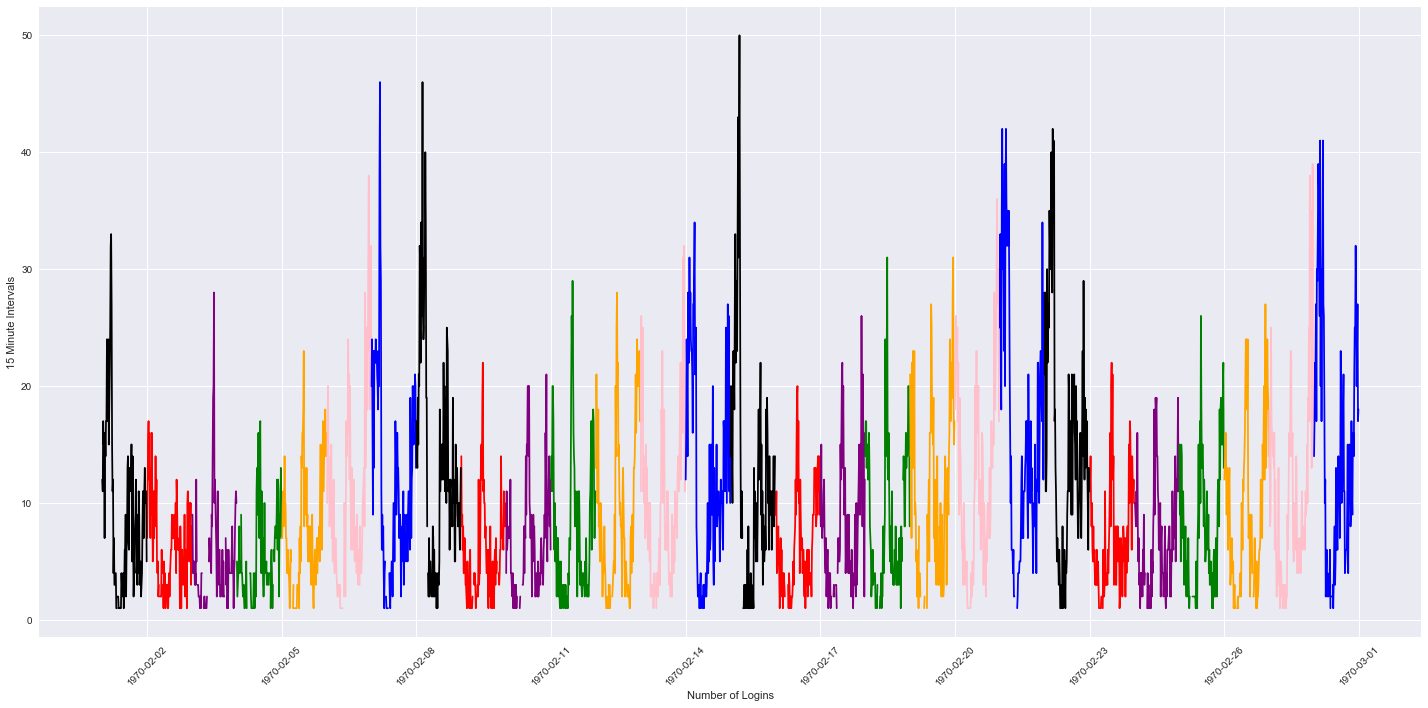

In [26]:
generate_dayplots(login_df['1970-02'])

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


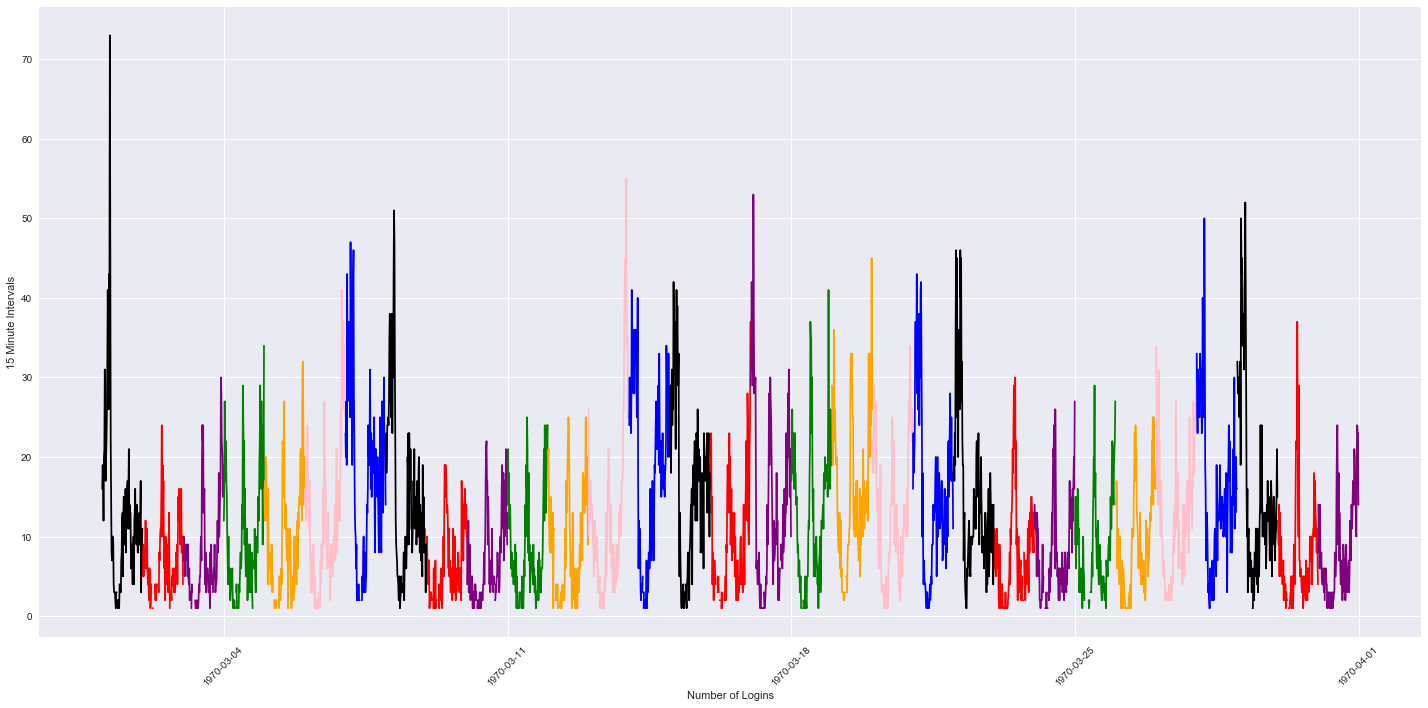

In [27]:
generate_dayplots(login_df['1970-03'])

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


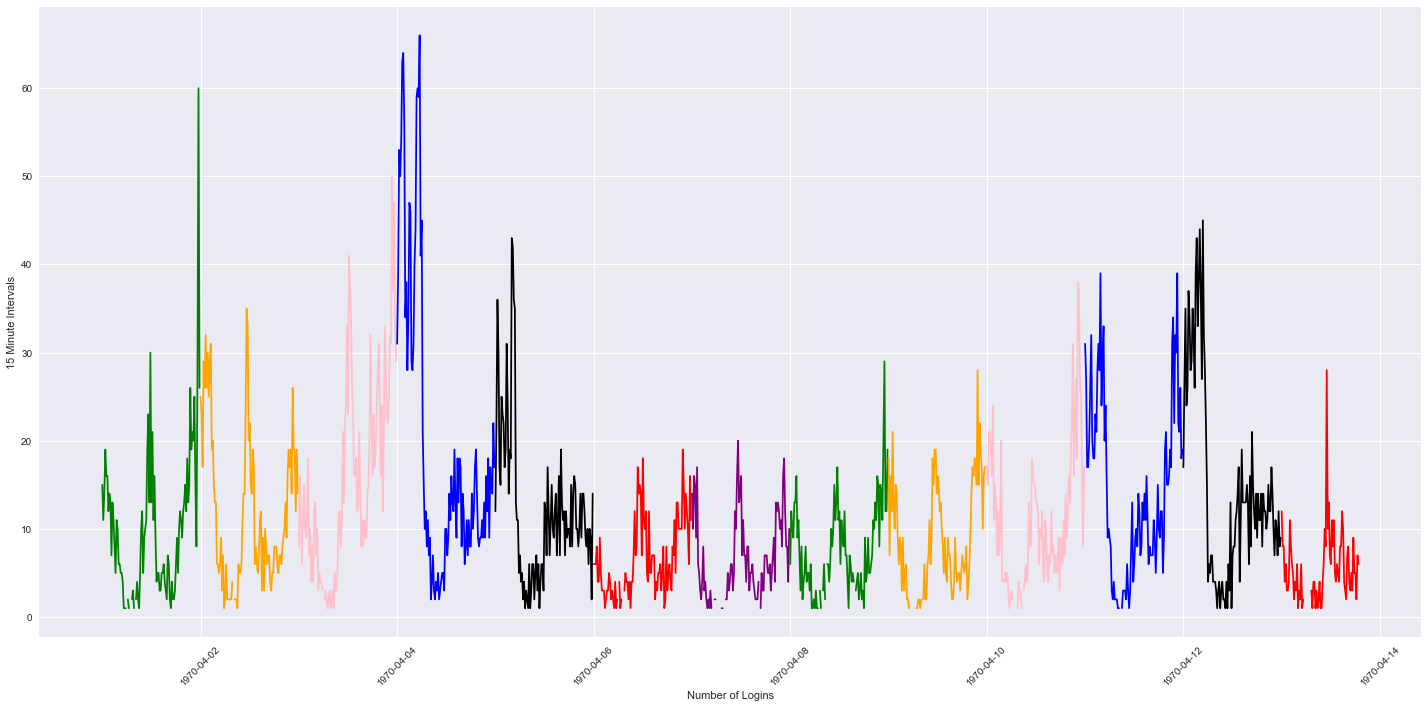

In [28]:
generate_dayplots(login_df['1970-04'])

The 4 plots above show the zoomed in version of the plot showing the days of the week. These plots reaffirm the fact that there is a cyclical nature in the number of logins. There are generally more logins on weekends compared to weekdays. 

# Part 2 - Experiments and Metrics Design

### Problem
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
> - how you will implement the experiment
> - what statistical test(s) you will conduct to verify the significance of the observation
> - how you would interpret the results and provide recommendations to the city operations team along with any caveats.

### Metric
The metric that would be used to measure the success in encouraging drivers to serve in both cities would be percentage of time spent by drivers in each city per day/week. This metric would provide the information needed to see if drivers are servicing both cities. Based on the information at hand, drivers in each city mostly spend their time in one city. If the toll between the two cities is paid for by Ultimate, then the time spent by drivers should be closer to 50/50. The previous data should be analyzed to ensure that the drivers don't service both cities.
### Experiment Design
The first step of the analysis would be to implement the policy of covering the tolls for each of the drivers. Data would be collected for 2-3 months, which would allow for drivers to get accustomed to the new rules and allow for a lot of data to be collected. The amount of data is important because it can increase the statistical power of the tests conducted. Once the data is collected, statistical inference would be conducted on the newly conducted data as well as the old data. After the analysis is completed, the results will need to be communicated to Ultimate to show them what happened during the study. For the statistical analysis, the p-values would be set to 0.05
### Statistical Tests
The statistical tests used to verify the significance would be a combination of hypothesis tests and confidence intervals. The drivers will be split into drivers that spend most of their time in Gotham and drivers that spend most of their time in Metropolis. The first hypothesis test would be to see if the difference in time spent by Gotham drivers in each city was 0 (this would mean that the service in both cities was equal). After completing that test, a confidence interval would be created to show the range of the potential difference between both cities. The same two tests (hypothesis test and confidence interval) would be completed for the Metropolis drivers. 
### Interpreting Results
At the end of the experiments, if the p-value is smaller than the set value of 0.05, then you can reject that the differences of time spent between the two cities is 0. This can also be verified by looking to see if the confidence intervals contain 0. 
### Caveats
The biggest caveat is whether this would be a profitable idea. If the results show that drivers are servicing both cities and it is not profitable, Ultimate could change the amount of that it covers for tolls. They could possibly work with each city to provide a discount on the tolls for their drivers due to them servicing each city more, which could increase revenue in both cities.

# Part 3 ‐ Predictive modeling

In [29]:
with open('ultimate_data_challenge.json') as f:
    data = json.load(f)
riders = pd.DataFrame(data)

In [30]:
riders.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [31]:
riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In this dataset, there are missing values for the two rating columns and the type of phone. The rating of driver is missing ~9000 rows, which is the most troubling. Removing those missing values would be removing 10% of the data. We can impute the missing values with the mean of the rating. The same can be done for the rating by driver. 
<br><br>
The next thing to do is convert the last trip date and signup date to datetime objects as they are both strings.

In [32]:
riders.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [33]:
riders['avg_rating_of_driver'] = riders['avg_rating_of_driver'].fillna(riders['avg_rating_of_driver'].mean())
riders['avg_rating_by_driver'] = riders['avg_rating_by_driver'].fillna(riders['avg_rating_by_driver'].mean())

The minimum value of the average distance is 0, which doesn't seem correct. Rides should be longer than 0 so these values will be removed from the dataset.

In [34]:
riders = riders[riders['avg_dist'] > 0]

In [35]:
riders.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,49850.000000,49850.000000,49850.000000,49850.000000,49850.000000,49850.000000,49850.000000
mean,5.814269,4.779822,4.602179,1.074873,8.864128,2.283129,60.940907
std,5.707059,0.439083,0.563307,0.222325,19.958115,3.797218,37.036305
min,0.010000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.430000,4.700000,4.500000,1.000000,0.000000,0.000000,33.300000
50%,3.900000,5.000000,4.800000,1.000000,0.000000,1.000000,66.700000
75%,6.960000,5.000000,5.000000,1.050000,8.700000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [36]:
riders['last_trip_date'] = pd.to_datetime(riders['last_trip_date'])
riders['signup_date'] = pd.to_datetime(riders['signup_date'])

In [37]:
riders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49850 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  49850 non-null float64
avg_rating_by_driver      49850 non-null float64
avg_rating_of_driver      49850 non-null float64
avg_surge                 49850 non-null float64
city                      49850 non-null object
last_trip_date            49850 non-null datetime64[ns]
phone                     49455 non-null object
signup_date               49850 non-null datetime64[ns]
surge_pct                 49850 non-null float64
trips_in_first_30_days    49850 non-null int64
ultimate_black_user       49850 non-null bool
weekday_pct               49850 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.6+ MB


We are now left with less than 50000 rows after the removal of the rides that had an average distance of 0.
<br><br>
Rider retention (a rider that has taken a ride in the last 30 days) is the metric that is going to be predicted in this analysis but this value does not exist in the dataset. To create it, we'll get the last trip day and subtract 30 days and check to see which riders have used Ultimate. The last day turns out to be July 1st, 2014. Based on this, the rider retention is true if the rider has taken Ultimate after June 1st, 2014.

In [38]:
sorted(list(riders['last_trip_date'].unique()))[-1]

numpy.datetime64('2014-07-01T00:00:00.000000000')

In [39]:
def retention(row):
    thirty_days = datetime(2014,7,1) - timedelta(days=30)
    val = 0
    if row['last_trip_date'] > thirty_days:
        val = 1
    else:
        val = 0
    return val

In [40]:
riders['retained'] = riders.apply(retention, 1)

There are missing values for the phone used column of the dataset. Because there are only a few hundred missing values, these will be removed from the dataset.

In [41]:
riders.dropna(axis=0, inplace=True)

In [42]:
riders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49455 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                  49455 non-null float64
avg_rating_by_driver      49455 non-null float64
avg_rating_of_driver      49455 non-null float64
avg_surge                 49455 non-null float64
city                      49455 non-null object
last_trip_date            49455 non-null datetime64[ns]
phone                     49455 non-null object
signup_date               49455 non-null datetime64[ns]
surge_pct                 49455 non-null float64
trips_in_first_30_days    49455 non-null int64
ultimate_black_user       49455 non-null bool
weekday_pct               49455 non-null float64
retained                  49455 non-null int64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(2), object(2)
memory usage: 5.0+ MB


In [43]:
riders.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,retained
count,49455.000000,49455.000000,49455.000000,49455.000000,49455.000000,49455.000000,49455.000000,49455.000000
mean,5.802849,4.779523,4.602107,1.075100,8.889922,2.282196,60.897414,0.367324
std,5.669330,0.439516,0.563540,0.222654,19.988227,3.797839,37.041353,0.482081
min,0.010000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.430000,4.700000,4.500000,1.000000,0.000000,0.000000,33.300000,0.000000
50%,3.890000,5.000000,4.800000,1.000000,0.000000,1.000000,66.700000,0.000000
75%,6.950000,5.000000,5.000000,1.050000,8.800000,3.000000,100.000000,1.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000,1.000000


The next phase of the cleanup is to look for outliers in some of the columns. Outliers in this analysis will be 3 standard deviations from the mean.

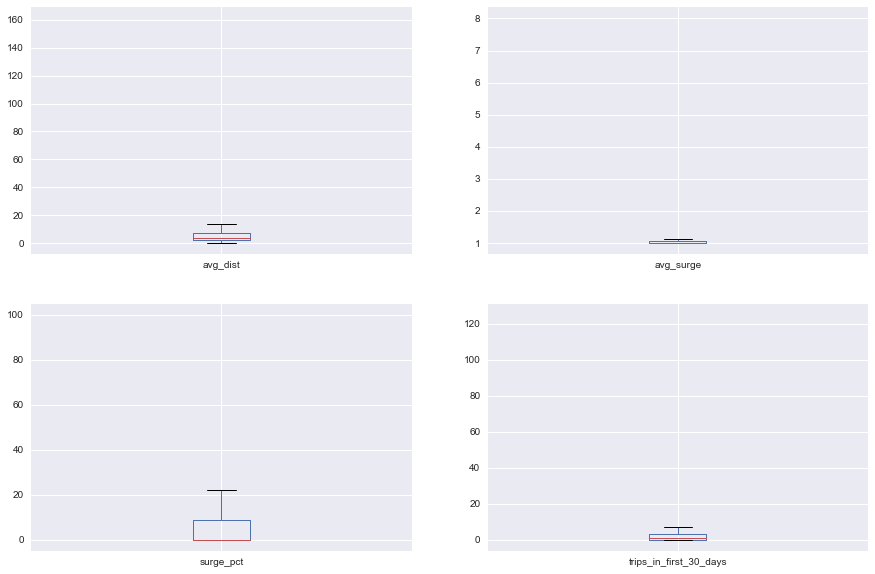

In [44]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
riders[['avg_dist']].boxplot()
plt.subplot(2,2,2)
riders[['avg_surge']].boxplot()
plt.subplot(2,2,3)
riders[['surge_pct']].boxplot()
plt.subplot(2,2,4)
riders[['trips_in_first_30_days']].boxplot()
plt.show()

Based on the box plot, there seems to be some outliers in each of the columns. The average distance will be cutdown at 23 for the average distance (mean of 5.8 + 5.7 (std dev) * 3)

In [45]:
riders = riders[riders['avg_dist'] < 23]

In [46]:
riders = riders[riders['avg_surge'] < 1.75]

In [47]:
riders = riders[riders['surge_pct'] < 69]

In [48]:
riders = riders[riders['trips_in_first_30_days'] < 14]

In [49]:
riders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45706 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                  45706 non-null float64
avg_rating_by_driver      45706 non-null float64
avg_rating_of_driver      45706 non-null float64
avg_surge                 45706 non-null float64
city                      45706 non-null object
last_trip_date            45706 non-null datetime64[ns]
phone                     45706 non-null object
signup_date               45706 non-null datetime64[ns]
surge_pct                 45706 non-null float64
trips_in_first_30_days    45706 non-null int64
ultimate_black_user       45706 non-null bool
weekday_pct               45706 non-null float64
retained                  45706 non-null int64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(2), object(2)
memory usage: 4.6+ MB


In [50]:
riders.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,retained
count,45706.000000,45706.000000,45706.000000,45706.000000,45706.000000,45706.000000,45706.000000,45706.000000
mean,5.384256,4.777088,4.601703,1.044288,5.893126,1.941627,61.219685,0.369908
std,4.331744,0.440172,0.562081,0.101758,12.124752,2.420133,36.612285,0.482785
min,0.010000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.430000,4.700000,4.500000,1.000000,0.000000,0.000000,33.300000,0.000000
50%,3.880000,5.000000,4.800000,1.000000,0.000000,1.000000,66.700000,0.000000
75%,6.780000,5.000000,5.000000,1.030000,5.900000,3.000000,100.000000,1.000000
max,22.990000,5.000000,5.000000,1.710000,66.700000,13.000000,100.000000,1.000000


## Exploratory Analysis

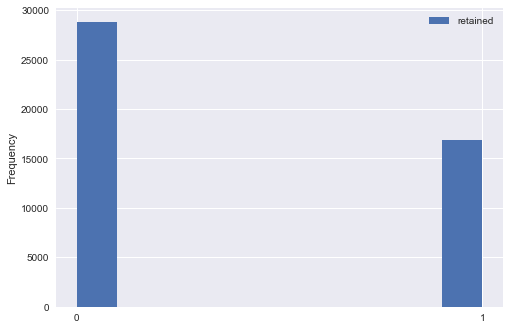

In [51]:
riders[['retained']].plot(kind='hist')
plt.xticks([0,1])
plt.show()

Based on the bar plot above, there are fewer retained riders than non-retained. This will need to be factored into the model. 
<br><br>
The next graphs show the breakdown of the variables based on the retained vs. non-retained riders.

In [52]:
dist_group = riders.groupby('retained')['avg_dist'].mean()
avg_rating_by = riders.groupby('retained')['avg_rating_by_driver'].mean()
avg_rating_of = riders.groupby('retained')['avg_rating_of_driver'].mean()
avg_surge = riders.groupby('retained')['avg_surge'].mean()
surge_pct = riders.groupby('retained')['surge_pct'].mean()
trips = riders.groupby('retained')['trips_in_first_30_days'].mean()
weekday = riders.groupby('retained')['weekday_pct'].mean()
b_user = riders[['retained','ultimate_black_user']].pivot_table(index='ultimate_black_user', columns='retained', aggfunc=len)
city = riders[['retained','city']].pivot_table(index='city', columns='retained', aggfunc=len)
phone = riders[['retained','phone']].pivot_table(index='phone', columns='retained', aggfunc=len)

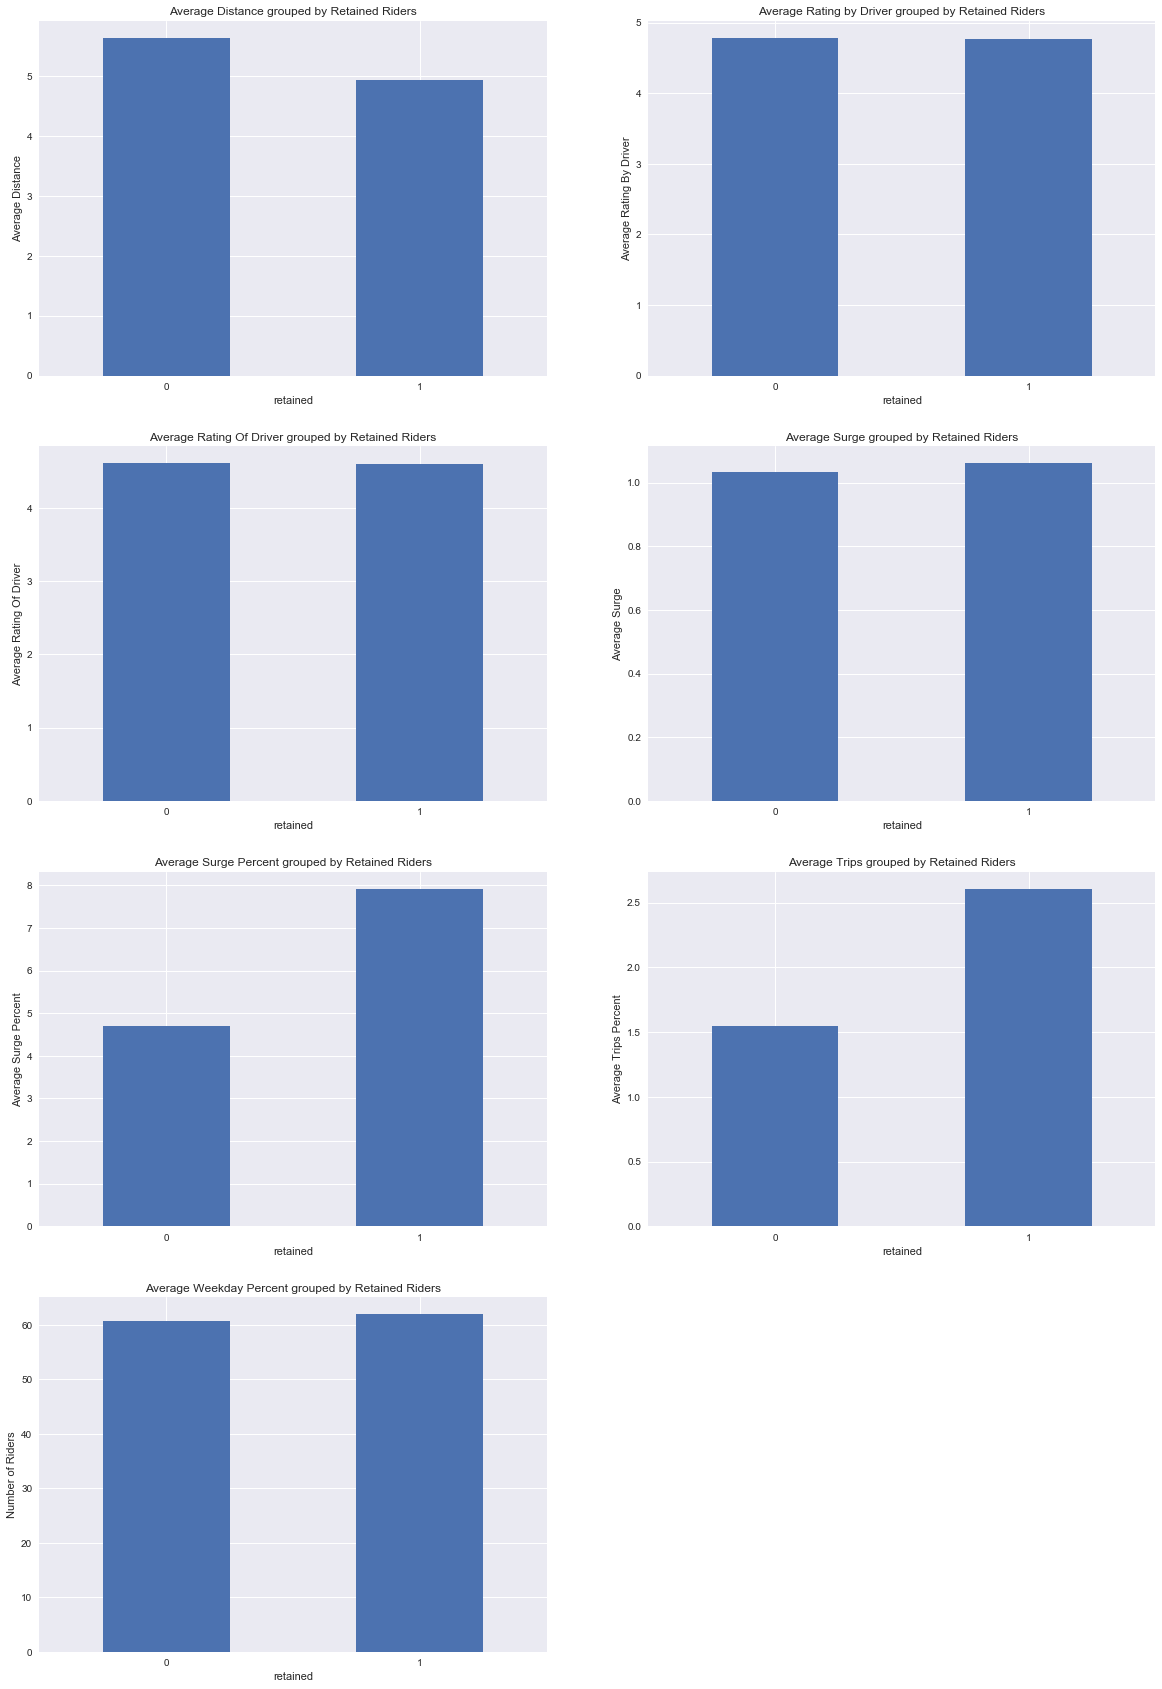

In [53]:
plt.figure(figsize=(20,30))

plt.subplot(4,2,1)
dist_group.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Average Distance')
plt.title('Average Distance grouped by Retained Riders')

plt.subplot(4,2,2)
avg_rating_by.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Average Rating By Driver')
plt.title('Average Rating by Driver grouped by Retained Riders')

plt.subplot(4,2,3)
avg_rating_of.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Average Rating Of Driver')
plt.title('Average Rating Of Driver grouped by Retained Riders')

plt.subplot(4,2,4)
avg_surge.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Average Surge')
plt.title('Average Surge grouped by Retained Riders')

plt.subplot(4,2,5)
surge_pct.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Average Surge Percent')
plt.title('Average Surge Percent grouped by Retained Riders')

plt.subplot(4,2,6)
trips.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Average Trips Percent')
plt.title('Average Trips grouped by Retained Riders')

plt.subplot(4,2,7)
weekday.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of Riders')
plt.title('Average Weekday Percent grouped by Retained Riders')
plt.show()

plt.show()

The average distance is higher for non-retained riders, though the difference does not seem very large. Both rating features seem to be equal based on the next two graphs above. The average surge percent is relatively the same for both rider types and the same goes for the percentage of rides done during the week. These features can probably be removed from the modeling.
<br><br>
The number of trips taken in the first 30 days is different for the different rider types. In addition to rides in the first 30 days, the percentage of rides with a surge is higher for retained riders. These two attributes can be included in the modeling as there is a difference between the two.

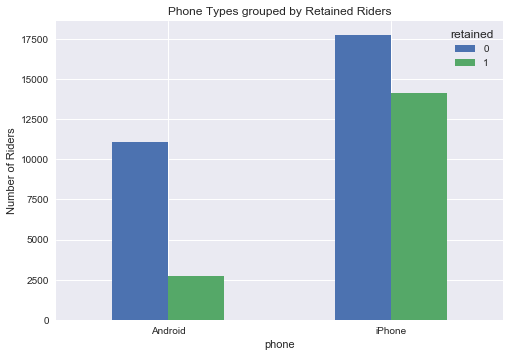

In [54]:
phone.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of Riders')
plt.title('Phone Types grouped by Retained Riders')

plt.show()

The user's type of phone shows a difference between the two rider types. In both cases, there are more non-retained riders for both android phones and iPhones.

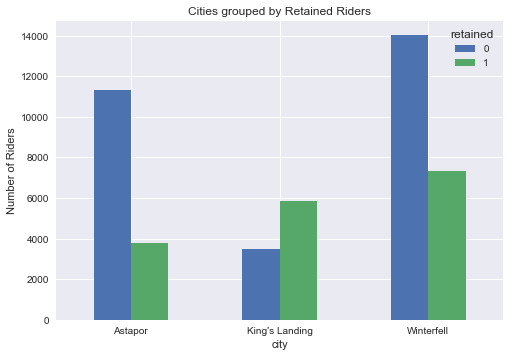

In [55]:
city.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of Riders')
plt.title('Cities grouped by Retained Riders')
plt.show()

The city that the user is based out of can also play a role in whether the rider is retained. There are more retained riders in only one of the cities and that is King's Landing. The other two cities have more non-retained riders.

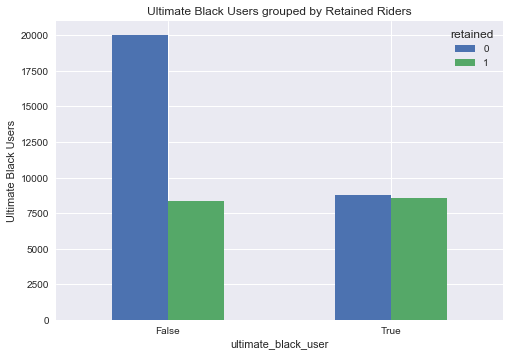

In [56]:
b_user.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Ultimate Black Users')
plt.title('Ultimate Black Users grouped by Retained Riders')
plt.show()

The number of riders that are ultimate black users shows a difference in the number of riders that are not when looking at retained vs. non-retained.

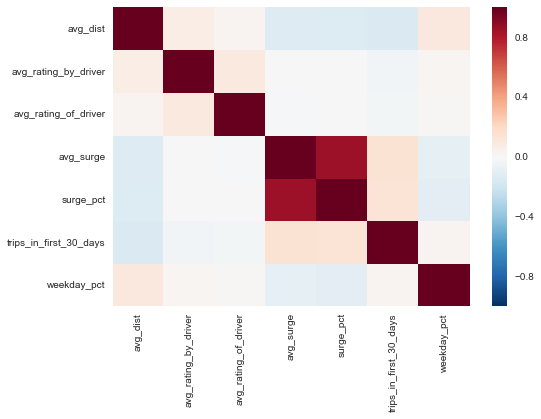

In [57]:
sns.heatmap(riders[['avg_dist','avg_rating_by_driver','avg_rating_of_driver','avg_surge','surge_pct','trips_in_first_30_days','weekday_pct']].corr())
plt.show()

The heat map above shows the correlations between the continuous features. Avg_surge and surge_pct have a high correlation so one of the features could be removed.

## Modeling

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

The first step of the modeling is to create categorical variables and create dummy variables so that Scikit learn can use categorical variables in models.

In [59]:
riders['ultimate_black_user'] = riders['ultimate_black_user'].astype('category')
riders['phone'] = riders['phone'].astype('category')
riders['city'] = riders['city'].astype('category')

riders = pd.get_dummies(riders, columns=['phone','city','ultimate_black_user'], drop_first=True)

In [60]:
riders.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,weekday_pct,retained,phone_iPhone,city_King's Landing,city_Winterfell,ultimate_black_user_True
0,3.67,5.0,4.7,1.10,2014-06-17,2014-01-25,15.4,4,46.2,1,1,1,0,1
1,8.26,5.0,5.0,1.00,2014-05-05,2014-01-29,0.0,0,50.0,0,0,0,0,0
2,0.77,5.0,4.3,1.00,2014-01-07,2014-01-06,0.0,3,100.0,0,1,0,0,0
3,2.36,4.9,4.6,1.14,2014-06-29,2014-01-10,20.0,9,80.0,1,1,1,0,1
5,10.56,5.0,3.5,1.00,2014-06-06,2014-01-09,0.0,2,100.0,1,1,0,1,1


In [61]:
riders.columns = ['avg_dist',
 'avg_rating_by_driver',
 'avg_rating_of_driver',
 'avg_surge',
 'last_trip_date',
 'signup_date',
 'surge_pct',
 'trips_in_first_30_days',
 'weekday_pct',
 'retained',
 'phone_iphone',
 "city_kl",
 'city_wf',
 'ub_user']

In [62]:
riders.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,weekday_pct,retained,phone_iphone,city_kl,city_wf,ub_user
0,3.67,5.0,4.7,1.10,2014-06-17,2014-01-25,15.4,4,46.2,1,1,1,0,1
1,8.26,5.0,5.0,1.00,2014-05-05,2014-01-29,0.0,0,50.0,0,0,0,0,0
2,0.77,5.0,4.3,1.00,2014-01-07,2014-01-06,0.0,3,100.0,0,1,0,0,0
3,2.36,4.9,4.6,1.14,2014-06-29,2014-01-10,20.0,9,80.0,1,1,1,0,1
5,10.56,5.0,3.5,1.00,2014-06-06,2014-01-09,0.0,2,100.0,1,1,0,1,1


Based on the exploratory analysis, the features included are average distance, percent surge, trips in first 30 days, phone, city, and ultimate black users and the response variable is the retained column. From there, the data is split into training and test sets.

In [63]:
X = riders.drop(['avg_rating_by_driver','avg_rating_of_driver','avg_surge','weekday_pct','retained','last_trip_date','signup_date'], 1)
y = riders['retained']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=3546)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((36564, 7), (9142, 7), (36564,), (9142,))

## Logistic Regression

In [64]:
c_space = np.linspace(0.0001, 50, 75)
penalty = ['l1','l2']
class_weight = [{0:.55, 1:.45}, {0:.57, 1:.43}, {0:.58, 1:.42}, {0:.53, 1:.47}]
param_grid = {'C': c_space, 'penalty':penalty, 'class_weight':class_weight}

log = LogisticRegression(n_jobs=-1)
log_gs = GridSearchCV(log, param_grid, cv=3)
log_gs.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-04,   6.75774e-01, ...,   4.93243e+01,   5.00000e+01]), 'penalty': ['l1', 'l2'], 'class_weight': [{0: 0.55, 1: 0.45}, {0: 0.57, 1: 0.43}, {0: 0.58, 1: 0.42}, {0: 0.53, 1: 0.47}]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [65]:
pred_lr = log_gs.predict(X_test)
score_lr = log_gs.score(X_test, y_test)
train_score_lr = log_gs.score(X_train, y_train)

train_score_lr, score_lr

(0.72174816759654303, 0.71844235397068479)

In [66]:
confusion_matrix(y_test, pred_lr)

array([[5075,  673],
       [1901, 1493]])

In [67]:
print(classification_report(y_test, pred_lr))

             precision    recall  f1-score   support

          0       0.73      0.88      0.80      5748
          1       0.69      0.44      0.54      3394

avg / total       0.71      0.72      0.70      9142



In [68]:
log_gs.best_params_

{'C': 0.67577432432432427, 'class_weight': {0: 0.53, 1: 0.47}, 'penalty': 'l1'}

In [69]:
roc_auc_score(y_test, pred_lr)

0.66140486363220696

The logistic regression model correctly guesses the retention rate ~72% of the time, which okay but not good. When you look at precision and recall, the model still is only okay. The model has a lot of false negatives which means the model could miss out on a lot of users that could be retained.

## Support Vector Machine

In [70]:
c_space = np.linspace(0.0001,50,20)
kernel = ['rbf','linear']
class_weight = [{0:.55, 1:.45},{0:.53, 1:.47}]
param_grid = {'C': c_space, 'kernel':kernel, 'class_weight':class_weight}

svm = SVC()
svm_gs = RandomizedSearchCV(svm, param_grid, n_iter=4, n_jobs=-1, cv=3)
svm_gs.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params={}, iid=True, n_iter=4, n_jobs=-1,
          param_distributions={'C': array([  1.00000e-04,   2.63167e+00,   5.26325e+00,   7.89482e+00,
         1.05264e+01,   1.31580e+01,   1.57895e+01,   1.84211e+01,
         2.10527e+01,   2.36843e+01,   2.63158e+01,   2.89474e+01,
         3.15790e+01,   3.42106e+01,   3.68421e+01,   3.94737e+01,
         4.21053e+01,   4.47369e+01,   4.73684e+01,   5.00000e+01]), 'kernel': ['rbf', 'linear'], 'class_weight': [{0: 0.55, 1: 0.45}, {0: 0.53, 1: 0.47}]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=0)

In [71]:
pred = svm_gs.predict(X_test)
score = svm_gs.score(X_test, y_test)
train_score = svm_gs.score(X_train, y_train)

train_score, score

(0.783174707362433, 0.74622620870706624)

In [72]:
confusion_matrix(y_test, pred)

array([[5178,  570],
       [1750, 1644]])

In [73]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.75      0.90      0.82      5748
          1       0.74      0.48      0.59      3394

avg / total       0.75      0.75      0.73      9142



In [74]:
roc_auc_score(y_test, pred)

0.69260964024688054

The SVM model does an okay job of predicting whether a rider will be retained but it still does not do a good job of limited false negatives (predicts a rider will not be retained when the rider is retained). This model does perform better than the Logistic Regression model in most aspects (accuracy, recall, precision, and ROC AUC).



## Random Forest

In [75]:
n_estimators = 500
class_weight = [{0:.55, 1:.45}, {0:.57, 1:.43}, {0:.58, 1:.42}, {0:.53, 1:.47}, {0:.6, 1:.4}]
max_depth = [5,10,15,20]
max_features = ['auto','sqrt','log2']
criterion = ['gini','entropy']
param_grid = {'class_weight':class_weight, 'criterion':criterion, 'max_depth':max_depth, 'max_features':max_features}

rf = RandomForestClassifier(n_estimators, n_jobs=-1)
rf_gs = RandomizedSearchCV(rf, param_grid, n_iter=15, cv=3, scoring='roc_auc')
rf_gs.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=15, n_jobs=1,
          param_distributions={'class_weight': [{0: 0.55, 1: 0.45}, {0: 0.57, 1: 0.43}, {0: 0.58, 1: 0.42}, {0: 0.53, 1: 0.47}, {0: 0.6, 1: 0.4}], 'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 15, 20], 'max_features': ['auto', 'sqrt', 'log2']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='roc_auc', verbose=0)

In [76]:
pred = rf_gs.predict(X_test)
score = rf_gs.score(X_test, y_test)
train_score = rf_gs.score(X_train, y_train)

train_score, score

(0.85296888793812686, 0.81338991010785322)

In [77]:
confusion_matrix(y_test, pred)

array([[5210,  538],
       [1735, 1659]])

In [78]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.75      0.91      0.82      5748
          1       0.76      0.49      0.59      3394

avg / total       0.75      0.75      0.74      9142



In [79]:
roc_auc_score(y_test, pred)

0.69760299911137136

In [80]:
rf_gs.best_params_

{'class_weight': {0: 0.57, 1: 0.43},
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto'}

The random forest model does a better job at predicting than the SVM and Logistic Regression in terms of accuracy. The precision and recall are similar to the SVM. As with the other two models, the number of false negatives is high which is an issue. 

## Final Model

In [112]:
X1 = riders.drop(['retained','last_trip_date','signup_date'], 1)
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=.20, random_state=3546)
X1_train.shape, X1_test.shape, y_train.shape, y_test.shape

rf1 = RandomForestClassifier(n_estimators, class_weight={0: 0.57, 1: 0.43}, criterion='gini', max_depth=10, max_features='auto', min_samples_leaf=40, n_jobs=-1, oob_score=True)
rf1.fit(X1_train,y_train)
pred_rf = rf1.predict(X1_test)
score_rf = rf1.score(X1_test, y_test)
train_score_rf = rf1.score(X1_train, y_train)

train_score_rf, score_rf

(0.78440542610217701, 0.77050973528768318)

In [113]:
rf1.feature_importances_

array([ 0.02971629,  0.17070689,  0.01870929,  0.10800838,  0.17519777,
        0.04519923,  0.10676198,  0.09275954,  0.16373343,  0.01322988,
        0.07597732])

In [114]:
confusion_matrix(y_test, pred_rf)

array([[5219,  529],
       [1569, 1825]])

In [115]:
print(classification_report(y_test, pred_rf))

             precision    recall  f1-score   support

          0       0.77      0.91      0.83      5748
          1       0.78      0.54      0.64      3394

avg / total       0.77      0.77      0.76      9142



In [116]:
roc_auc_score(y_test, pred_rf)

0.72284080056130817

In [117]:
X1_train.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,phone_iphone,city_kl,city_wf,ub_user
45629,2.19,5.0,5.0,1.0,0.0,1,100.0,0,1,0,0
41707,2.42,5.0,4.8,1.0,0.0,2,50.0,1,0,1,0
13071,4.97,4.5,4.0,1.0,0.0,0,75.0,1,1,0,1
27116,2.88,5.0,3.0,1.0,0.0,1,100.0,0,0,1,0
20226,3.12,5.0,5.0,1.0,0.0,2,66.7,1,1,0,1


The final model is a random forest. This model has a higher ROC AUC score, precision, and recall than all of the other models. It uses all of the features outside of the two dates. This model does a better job of reducing the amount of false negatives, which is good. Some of the important features are average rating by the driver, percentage of rides that had a surge, average surge, percentage of weekday rides, and if the rider was in King's Landing.

## What can be done with the model?
Based on this model, Ultimate can find the users that will not be retained and offer them deals to get them to use their service. They could also reach out to the riders to gather information as to what they like and do not like about Ultimate.